# Akshay Mahi

## Research question/interests



Update Question 3: **Which month has the highest average concentration of NOx and CO? From this, of the given month, which day of the week has highest average concentration?**

Update Question 2: **Which month has the highest average concentration of NOx and CO? From this, which specific day of the month has the highest contamination levels.**

Updated Question: **Does the concentration/output of NOx, CO, and NO2 demonstrate a trend over a given time interval? If so, when has the highest and lowest points over the timeframe**

Question: **Is concentration of NOx in the atmopshere positively correlated with air temperatures and humidity- what is the bearing of time on the output?**



In [ ]:
#Loading Data set and imports
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pylab as plt
import datetime as dt
df = pd.read_csv("../data/raw/AirQualityUCI.csv", sep=";", decimal=",", parse_dates=['Date'], dayfirst=True)

df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


### Exploratory Data Analysis

In [ ]:
#Getting the column values and order to understand variables.
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [ ]:
#Discovering the shape of the dataset.
df.shape

(9471, 17)

In [ ]:
#Finding data types.
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Unnamed: 15             float64
Unnamed: 16             float64
dtype: object

In [ ]:
#Identifying unique values.
df.nunique(axis=0)

Date              391
Time               24
CO(GT)             97
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
Unnamed: 15         0
Unnamed: 16         0
dtype: int64

In [ ]:
#Printing general statistics of dataset.
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [ ]:
# Renaming important columns and removing columns that are not relevant.
df = df.rename(columns={'NOx(GT)':'NOx_GT', 'NO2(GT)':'NO2_GT', 'T':'Temp','CO(GT)':'CO_GT'})
df = df.drop(df.columns[[3, 4, 5, 6, 8, 10, 11 ,15, 16,]], axis=1)

df

,Date,Time,CO_GT,NOx_GT,NO2_GT,Temp,RH,AH
0,2004-03-10,18.00.00,2.6,166.0,113.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,103.0,92.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,131.0,114.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,172.0,122.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...
9466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping all NaN values.
df = df.dropna()
df

,Date,Time,CO_GT,NOx_GT,NO2_GT,Temp,RH,AH
0,2004-03-10,18.00.00,2.6,166.0,113.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,103.0,92.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,131.0,114.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,172.0,122.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,472.0,190.0,21.9,29.3,0.7568
9353,2005-04-04,11.00.00,2.4,353.0,179.0,24.3,23.7,0.7119
9354,2005-04-04,12.00.00,2.4,293.0,175.0,26.9,18.3,0.6406
9355,2005-04-04,13.00.00,2.1,235.0,156.0,28.3,13.5,0.5139


In [ ]:
#Identifying datatypes.
df.dtypes

Date      datetime64[ns]
Time              object
CO_GT            float64
NOx_GT           float64
NO2_GT           float64
Temp             float64
RH               float64
AH               float64
dtype: object

In [ ]:
#Based on the information provided in the describe function above, dropping all undetermined values.
df = df[(df.NOx_GT != -200)]
df = df[(df.NO2_GT != -200)]
df = df[(df.Temp != -200)]
df = df[(df.RH != -200)]
df = df[(df.AH != -200)]
df = df[(df.CO_GT != -200)]
df_cleaned = df.reset_index(drop=True)

df_cleaned


        

,Date,Time,CO_GT,NOx_GT,NO2_GT,Temp,RH,AH
0,2004-03-10,18.00.00,2.6,166.0,113.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,103.0,92.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,131.0,114.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,172.0,122.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,131.0,116.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...
6936,2005-04-04,10.00.00,3.1,472.0,190.0,21.9,29.3,0.7568
6937,2005-04-04,11.00.00,2.4,353.0,179.0,24.3,23.7,0.7119
6938,2005-04-04,12.00.00,2.4,293.0,175.0,26.9,18.3,0.6406
6939,2005-04-04,13.00.00,2.1,235.0,156.0,28.3,13.5,0.5139


In [ ]:
#Ensuring data has been successfully cleaned. 
df_cleaned.describe()

,CO_GT,NOx_GT,NO2_GT,Temp,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,250.671949,113.874082,17.755323,48.881905,0.985573
std,1.441158,208.611371,47.475017,8.844909,17.433193,0.401097
min,0.100000,2.000000,2.000000,-1.900000,9.200000,0.184700
25%,1.100000,103.000000,79.000000,11.200000,35.300000,0.694100
50%,1.900000,186.000000,110.000000,16.800000,49.200000,0.953900
75%,2.900000,335.000000,142.000000,23.700000,62.200000,1.251600
max,11.900000,1479.000000,333.000000,44.600000,88.700000,2.180600


Text(0.5, 1.0, 'Correlation Matrix of Dataset')

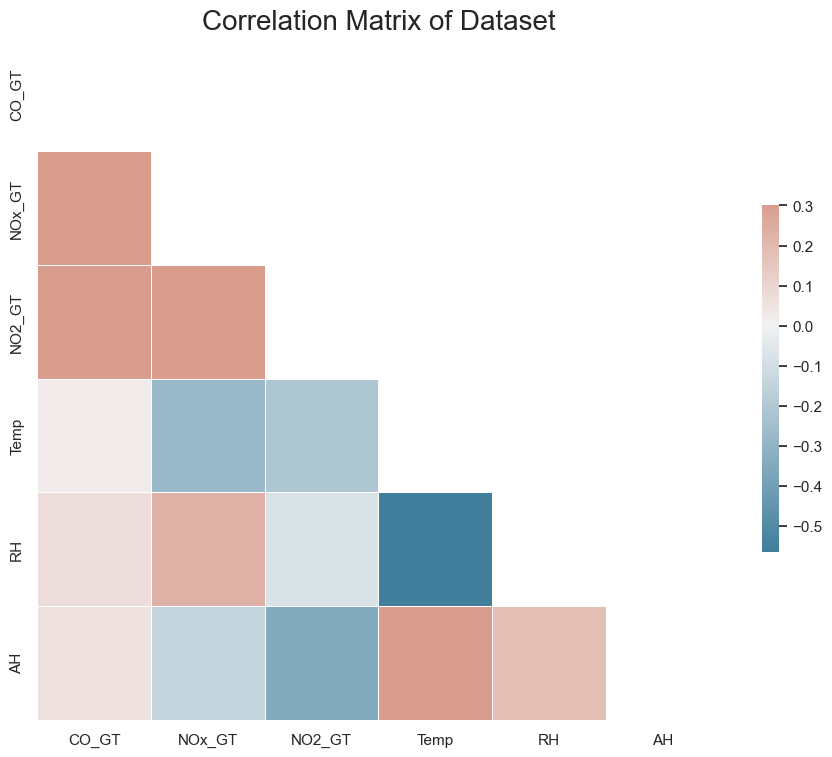

In [ ]:
#Creating correlation map.
sns.set_theme(style="white")


# Compute the correlation matrix
corr = df_cleaned.corr(numeric_only= True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
map = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Dataset', fontsize=20)


### Observations (From Heat Map)
This correlation matrix measures the variables against each other. It was done during the preliminary stages of the project to help guide the research question. 

An inverse relationship between temperature and relative humidity is shown in addition to most of the contaminants.

Temperature and absolute humidity have a strong correlation relationship.

CO_GT has a strong correlation with NO2_GT and NOx_GT.


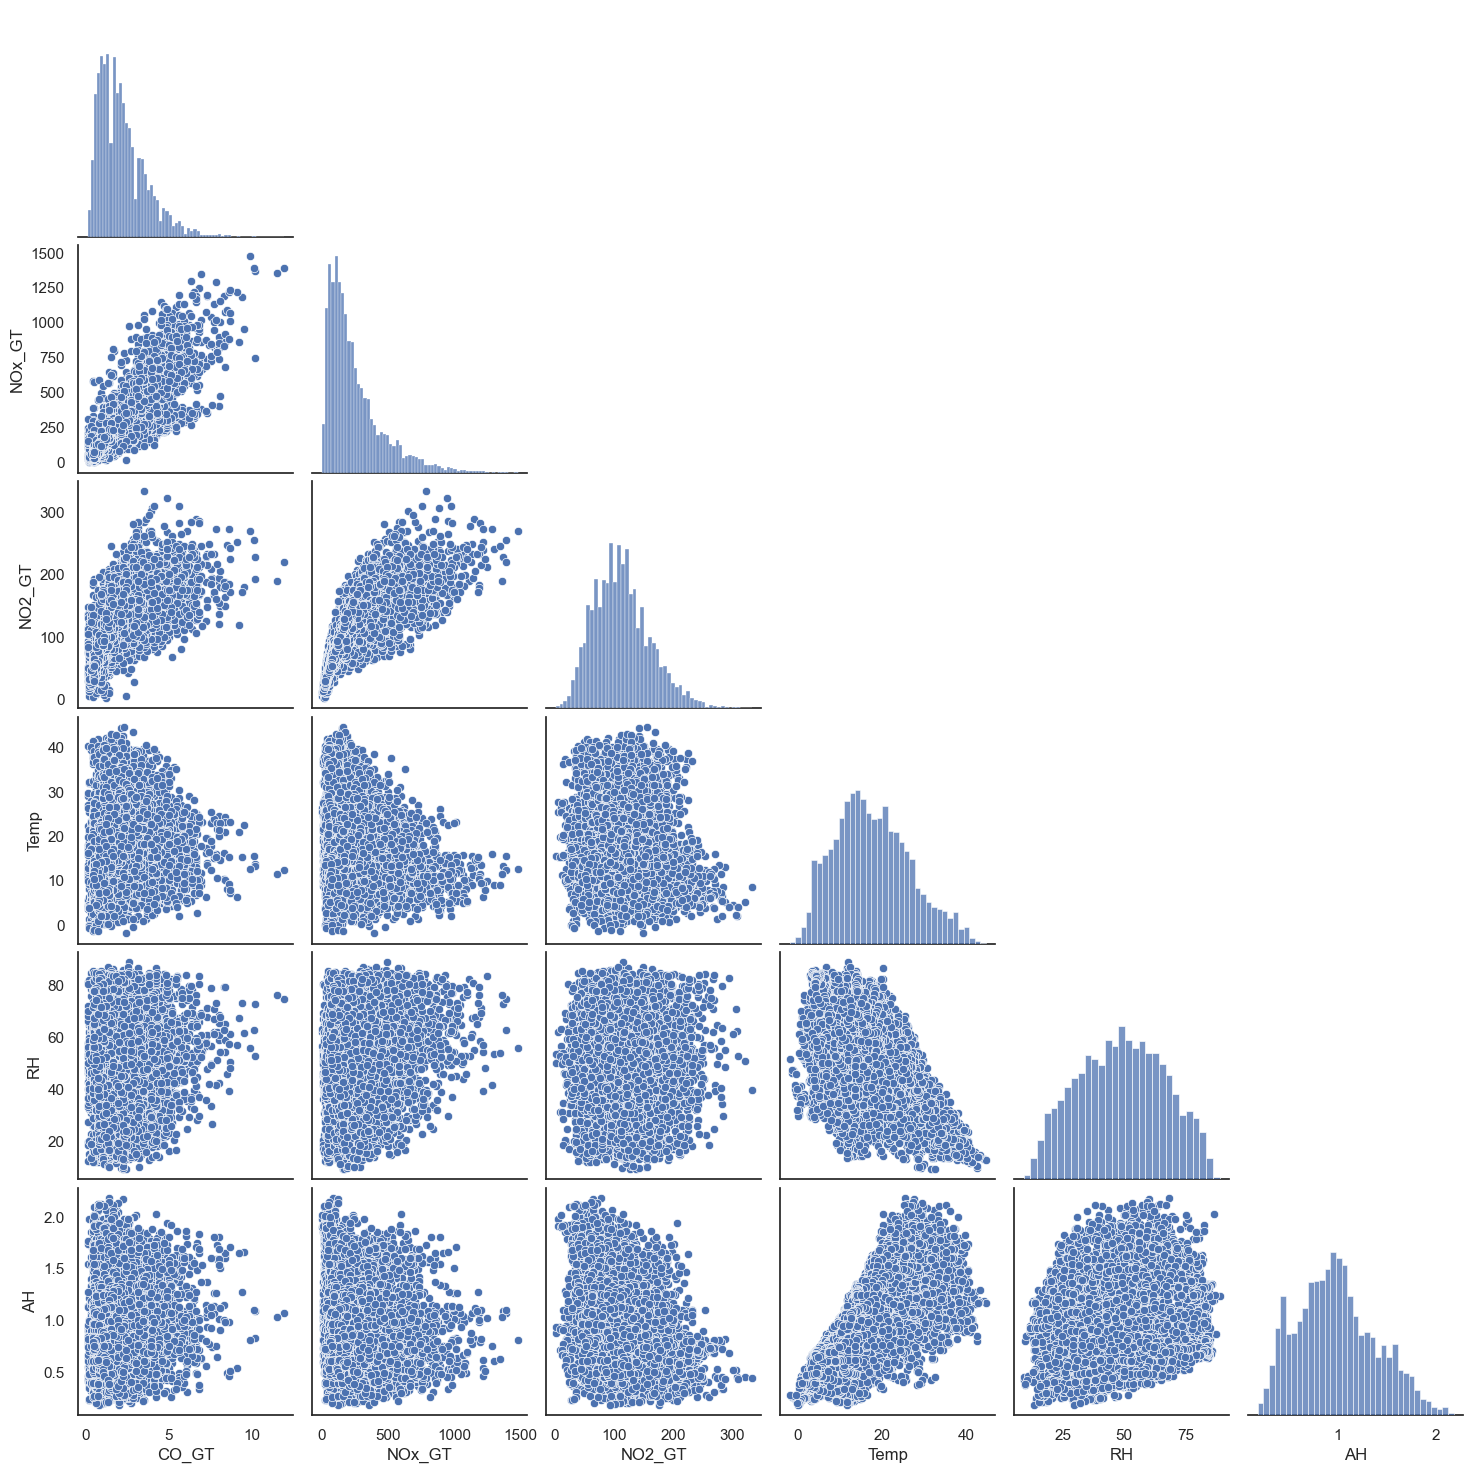

In [ ]:
pairplot = sns.pairplot(df_cleaned, 
corner = True, 
kind = "scatter")
pairplot.set_axis_title=('Plot of Nitrogenous parameters')

### Observations (From Pairplot)

The distribution of CO_GT and NOx_GT are skewed to the left while NO2_GT, Temp, RH, and AH are more evenly distributed.

Majority of the chemicals trend positively together.


## Research Question Revision

After analyzing a few generic plots and looking into the chemical compounds that are available in addition to getting a better understanding on relative humidity vs absolute humidity, I plan to change my question slightly to focus on trends I better understand.

Original Question:**Is concentration of NOx in the atmopshere positively correlated with air temperatures and humidity- what is the bearing of time on the output?**

Updated Question: **Does the concentration/output of NOx and CO demonstrate a trend over a given time interval? If so, when has the highest and lowest points over the timeframe**

#### Conducting Analysis 

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pylab as plt
import datetime as dt
#Loading the dataset.
df = pd.read_csv("../data/raw/AirQualityUCI.csv", sep=";", decimal=",", parse_dates=['Date'], dayfirst=True)

#Renaming importat columns for increased readability and data entery, followed by deletion of non-utilized columns. Lastly converting object to datetime.
df = (df.rename(columns={'NOx(GT)':'NOx_GT', 'NO2(GT)':'NO2_GT', 'T':'Temp','CO(GT)':'CO_GT', 'Time':'Hour'})
    .drop(df.columns[[3, 4, 5, 6, 8, 10, 11 ,15, 16,]], axis=1))


#Replacing missing values with NaN.
df.replace(to_replace=-200, value= np.NaN, inplace=True)

#Creating Day and Month column
df['Day'] = df['Date'].dt.day_name() 
df['Month'] = df['Date'].dt.month_name()
#Formating hour column.
df['Hour'] = pd.to_datetime(df['Hour'], format='%H.%M.%S').dt.hour


#Dropping all NaN values, restting the index for clarity.
df2= (df.dropna()
    .reset_index(drop=True))
#Setting the index as Date      
df2.set_index("Date", inplace= True)


df2.head(10)

,Hour,CO_GT,NOx_GT,NO2_GT,Temp,RH,AH,Day,Month
Date,,,,,,,,,
2004-03-10,18.0,2.6,166.0,113.0,13.6,48.9,0.7578,Wednesday,March
2004-03-10,19.0,2.0,103.0,92.0,13.3,47.7,0.7255,Wednesday,March
2004-03-10,20.0,2.2,131.0,114.0,11.9,54.0,0.7502,Wednesday,March
2004-03-10,21.0,2.2,172.0,122.0,11.0,60.0,0.7867,Wednesday,March
2004-03-10,22.0,1.6,131.0,116.0,11.2,59.6,0.7888,Wednesday,March
2004-03-10,23.0,1.2,89.0,96.0,11.2,59.2,0.7848,Wednesday,March
2004-03-11,0.0,1.2,62.0,77.0,11.3,56.8,0.7603,Thursday,March
2004-03-11,1.0,1.0,62.0,76.0,10.7,60.0,0.7702,Thursday,March
2004-03-11,2.0,0.9,45.0,60.0,10.7,59.7,0.7648,Thursday,March


In [ ]:
import sys
sys.path.append('../..')

In [ ]:
from script import project_functions1 as test

In [ ]:
df_clean = test.load_and_process()

In [ ]:

df_clean.to_csv("../data/processed/AirQualityUCI_AM.csv", index=True)

In [ ]:
df_clean.head(10)

,Hour,CO_GT,NOx_GT,Day,Month
Date,,,,,
2004-03-10,18.0,2.6,166.0,Wednesday,March
2004-03-10,19.0,2.0,103.0,Wednesday,March
2004-03-10,20.0,2.2,131.0,Wednesday,March
2004-03-10,21.0,2.2,172.0,Wednesday,March
2004-03-10,22.0,1.6,131.0,Wednesday,March
2004-03-10,23.0,1.2,89.0,Wednesday,March
2004-03-11,0.0,1.2,62.0,Thursday,March
2004-03-11,1.0,1.0,62.0,Thursday,March
2004-03-11,2.0,0.9,45.0,Thursday,March


,CO_GT
Date,
2004-03-31,2.350955
2004-04-30,2.369474
2004-05-31,1.986819
2004-06-30,1.941419
2004-07-31,1.832276
2004-08-31,1.308534
2004-09-30,2.335227
2004-10-31,2.808533
2004-11-30,2.760502


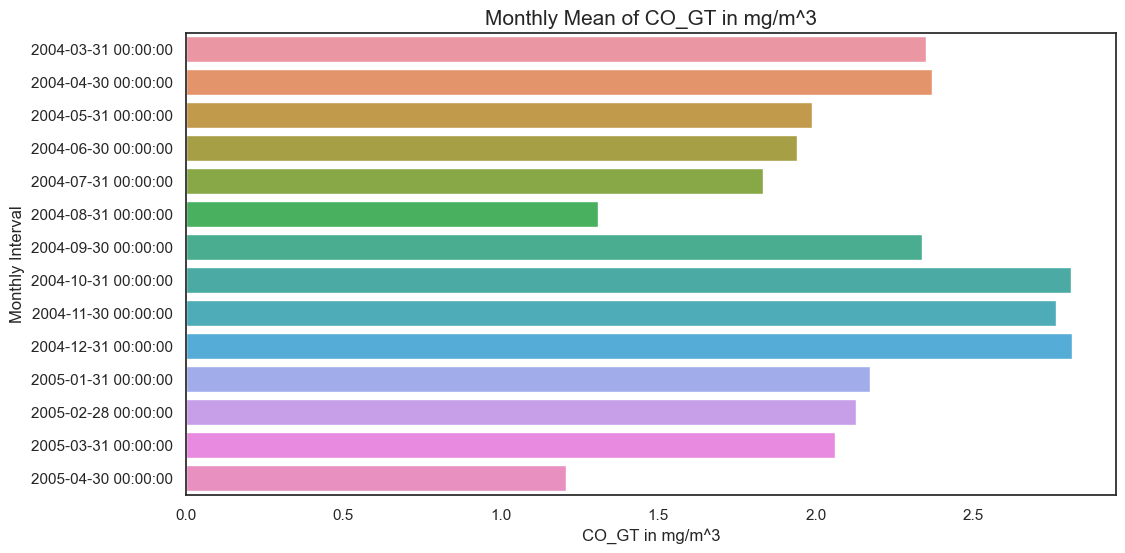

In [ ]:

avg_month_CO_GT= df_clean[['CO_GT']].resample('M').mean()
plt.figure(figsize=(12,6))
sns.barplot(data= df_clean, y=avg_month_CO_GT.index, x= avg_month_CO_GT['CO_GT'], orient='h').set(ylabel ="Monthly Interval", xlabel = "CO_GT in mg/m^3")
plt.title('Monthly Mean of CO_GT in mg/m^3', fontsize=15)


avg_month_CO_GT

### Observations (From Barplot)
This graph shows December, 2004 having the greatest mean of CO_GT in mg/m^3, only slightly more than October and November, 2004.

August, 2004, and December, 2005 are significantly lower when compared to the remaining months.


Text(0.5, 1.0, 'CO_GT in mg/m^3 Concentration on December, 2004')

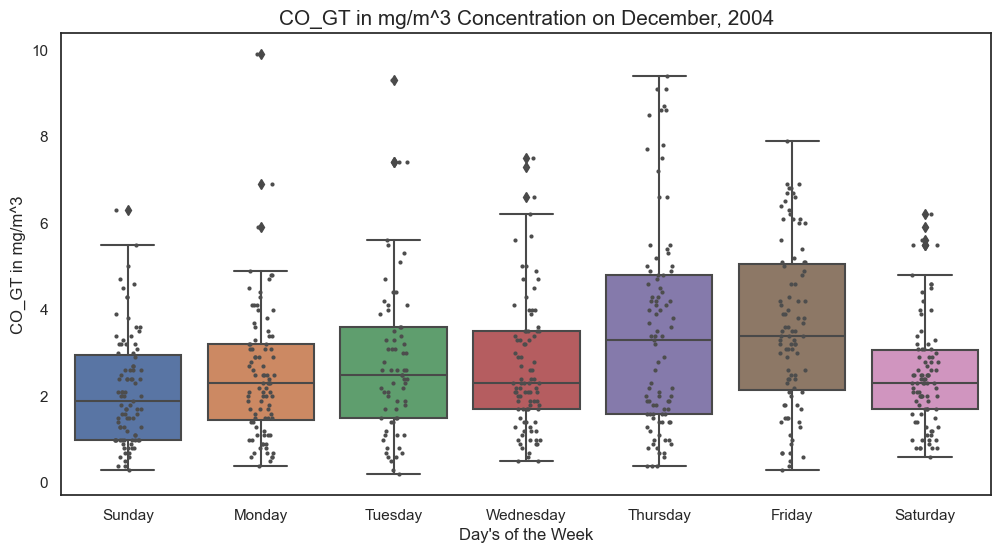

In [ ]:
df3=df_clean.loc['2004-12-1':'2004-12-31']

order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.figure(figsize=(12,6))
sns.boxplot(x=df3['Day'], y= df3['CO_GT'], order=order).set(xlabel ="Day's of the Week", ylabel = "CO_GT in mg/m^3")
sns.stripplot(x=df3['Day'], y= df3['CO_GT'], order=order,
              size=3, color=".3", linewidth=0)
plt.title("CO_GT in mg/m^3 Concentration on December, 2004", fontsize=15)


### Observations (From Boxplot)
This graph shows that during the month of December, 2004, Thursday and Friday have the highest average concentration. 

On Friday, the median, Q1 and Q3 values are higher than any other day.

Thursday has the highest max value.

Both Thursday and Friday have no outlires detected.

Overall, Friday has the highest average concentration during the month of December.

Text(0.5, 1.0, 'Monthly Mean of CO_GT in mg/m^3')

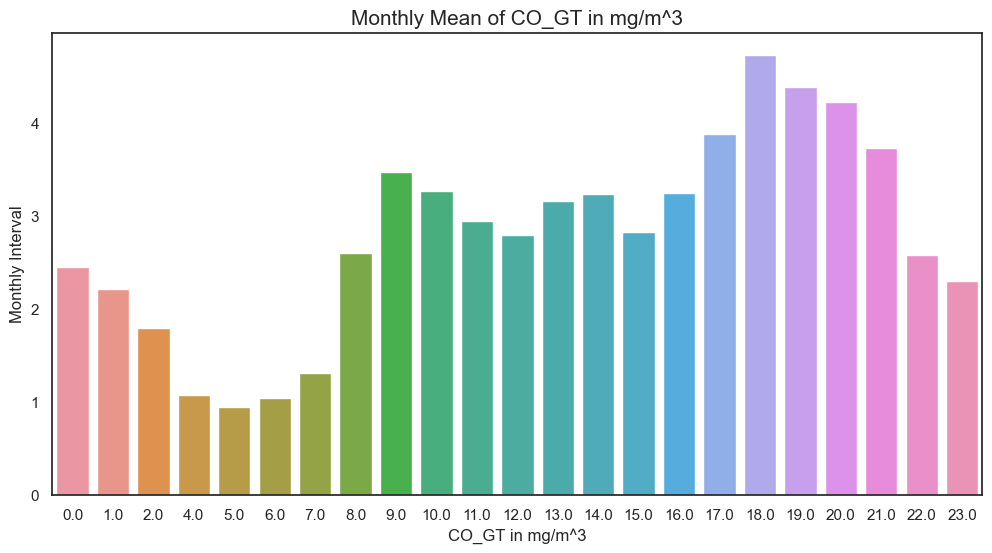

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data= df3, x=df3['Hour'], y= df3['CO_GT'], errorbar= None).set(ylabel ="Monthly Interval", xlabel = "CO_GT in mg/m^3")
plt.title('Monthly Mean of CO_GT in mg/m^3', fontsize=15)


### Observations (From Barchart)
This graph shows 18:00 having the highest average.

It also shows that the concentration is generaly greater in the later morning and evenings, trending similarly to active hours of individuals.

,NOx_GT
Date,
2004-03-31,146.787686
2004-04-30,142.736842
2004-05-31,126.813708
2004-06-30,125.595710
2004-07-31,129.970149
2004-08-31,73.063457
2004-09-30,282.422727
2004-10-31,345.450667
2004-11-30,427.708464


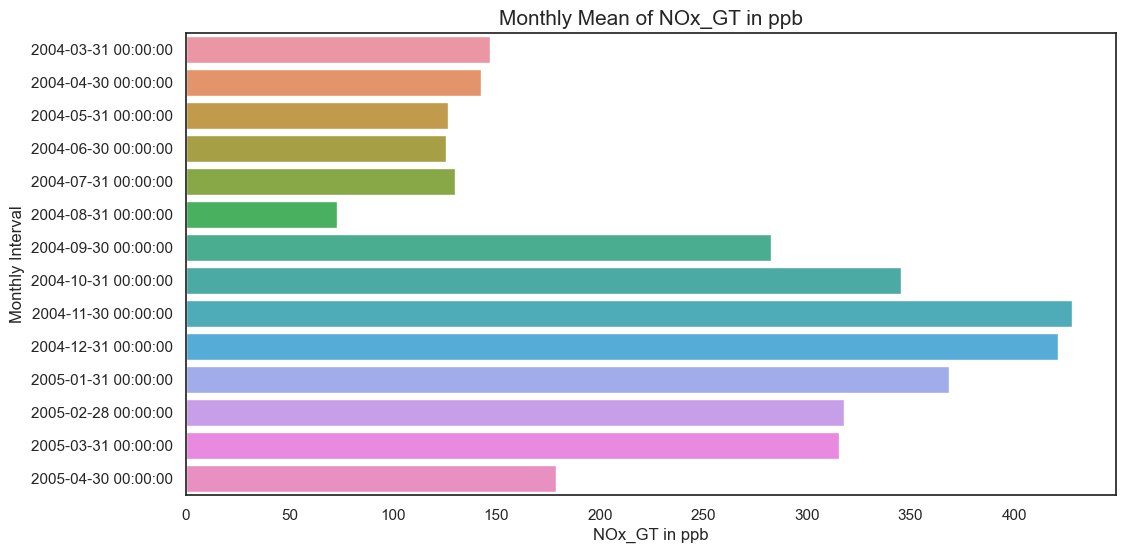

In [ ]:

avg_month_NOx_GT= df_clean[['NOx_GT']].resample('M').mean()
plt.figure(figsize=(12,6))
sns.barplot(y=avg_month_NOx_GT.index, x= avg_month_NOx_GT['NOx_GT'], orient='h').set(ylabel ="Monthly Interval", xlabel = "NOx_GT in ppb")
plt.title('Monthly Mean of NOx_GT in ppb', fontsize=15)
avg_month_NOx_GT


### Observations (From Barplot)
This graph shows that November, 2004 has the highest average of NOx_GT, with December, 2004 closly behind.

The first 6 months plotted are significantly lower than the remaining months, with August, 2004 having the lowest average.

Text(0.5, 1.0, 'NOx_GT Concentration in ppb on November, 2004')

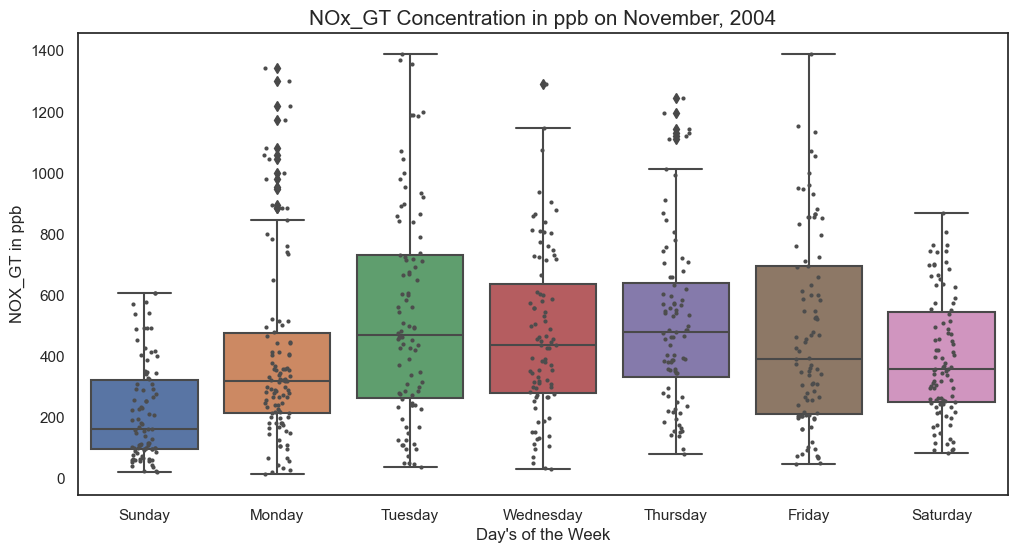

In [ ]:
df4=df_clean.loc['2004-11-1':'2004-11-30']

order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.figure(figsize=(12,6))
sns.boxplot(x=df4['Day'], y= df4['NOx_GT'], order=order).set(xlabel ="Day's of the Week", ylabel = "NOX_GT in ppb")
sns.stripplot(x=df4['Day'], y= df4['NOx_GT'], order=order,
              size=3, color=".3", linewidth=0)
plt.title('NOx_GT Concentration in ppb on November, 2004', fontsize=15)

### Observations (From Boxplot)
This graph shows that during November, 2004, Tuesday and Thursday has similar means of concentration of NOx_GT in ppb.

Tuesday has the higher Q3 and max value while Thursday has the higher Q1.

There are no detected outliers for Tuesday but multiple for Thursday.

Overall, Thursday has the highest average concentration during the month of November.

Text(0.5, 1.0, 'Monthly Mean of CO_GT in mg/m^3')

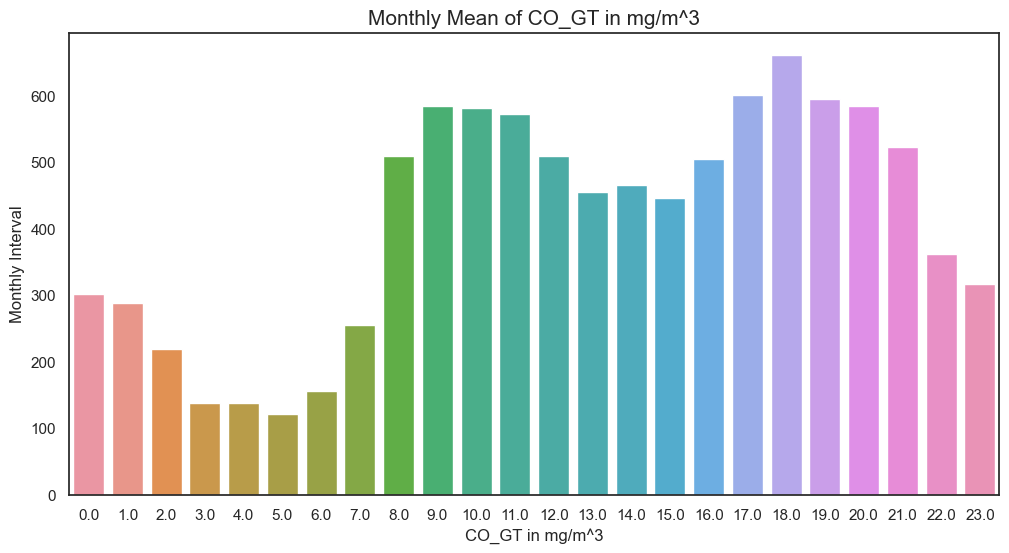

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data= df4, x=df4['Hour'], y= df4['NOx_GT'], errorbar= None).set(ylabel ="Monthly Interval", xlabel = "CO_GT in mg/m^3")
plt.title('Monthly Mean of CO_GT in mg/m^3', fontsize=15)


### Observations (From Barchart)
This graph shows 18:00 having the highest average, the same as the CO_GT graph. 

It also shows that the concentration is generaly greater in the later morning and evenings, trending similarly to active hours of individuals, which is a similar trend with CO_GT.